# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [144]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [98]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')


In [99]:
headers = html_soup.find_all('th')
rows = html_soup.find_all('tr', class_="data-row")

In [100]:
print(headers, '\n', rows)

[<th>id</th>, <th>terrestrial_date</th>, <th>sol</th>, <th>ls</th>, <th>month</th>, <th>min_temp</th>, <th>pressure</th>] 
 [<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [101]:
# Create an empty list for headers
column_headers = []

# Loop through the scraped data to create a list of rows
for header in headers:
    column_headers.append(header.text)

# Create another empty list for data
mars_weather_data = []
print
# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = []
    data = row.find_all('td')
    for text in data:
        row_data.append(text.text)
    mars_weather_data.append(row_data)


# # Create a pandas DataFrame from the list of dictionaries
df_mars_weather_data = pd.DataFrame(mars_weather_data) #columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
df_mars_weather_data 


,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [102]:
# Create another empty list for data
mars_weather_data = []

# Loop through the scraped data to create a list of rows
for row in rows:
    row_data = []
    for data in row.find_all('td'):
        row_data.append(data.text)
    mars_weather_data.append(row_data)
    
mars_weather_data
# Create a pandas DataFrame from the list of dictionaries
df_mars_weather_data = pd.DataFrame(mars_weather_data)

In [103]:
df_mars_weather_data.columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

In [104]:
# Confirm DataFrame was created successfully
df_mars_weather_data.sample(7)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
152,75,2013-01-23,166,250,9,-65.0,922.0
207,143,2013-04-17,248,302,11,-70.0,877.0
981,1007,2015-08-16,1076,28,1,-81.0,880.0
1201,1229,2016-03-31,1298,130,5,-79.0,755.0
77,234,2012-11-07,91,202,7,-74.0,817.0
372,392,2013-10-18,427,37,2,-81.0,893.0
1544,1573,2017-03-31,1653,341,12,-75.0,833.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [105]:
# Examine data type of each column
df_mars_weather_data.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [110]:
# Change data types for data analysis
df_mars_weather_data['id'] = df_mars_weather_data['id'].astype(int)
df_mars_weather_data['terrestrial_date'] = pd.to_datetime(df_mars_weather_data['terrestrial_date'])
df_mars_weather_data['sol'] = df_mars_weather_data['sol'].astype(int)
df_mars_weather_data['ls'] = df_mars_weather_data['ls'].astype(int)
df_mars_weather_data['month'] = df_mars_weather_data['month'].astype(int)
df_mars_weather_data['min_temp'] = df_mars_weather_data['min_temp'].astype(float)
df_mars_weather_data['pressure'] = df_mars_weather_data['pressure'].astype(float)

In [112]:
# Confirm type changes were successful by examining data types again
df_mars_weather_data.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [113]:
# 1. How many months are there on Mars?
num_months = df_mars_weather_data['month'].max()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [114]:
# 2. How many Martian days' worth of data are there?
num_sols =df_mars_weather_data['sol'].count()
print(f"There are {num_sols} Martian days' worth of data.")

There are 1867 Martian days' worth of data.


In [115]:
# 3. What is the average low temperature by month?
mean_min_temp = []
mmt = [] #Empty lists
for month in range(1, 13):
    mean_min_temp.append(df_mars_weather_data[df_mars_weather_data['month'] == month]['min_temp'].mean())
mars_months = list(range(1, 13))
mmt = [{'Mars Month': mars_months, 'Average Monthly Temperature': mean_min_temp}]
# create a new dataframe with mars_months and mean_min_temp data
mmt_df = pd.DataFrame({'Mars Month': mars_months, 'Average Monthly Temperature': mean_min_temp})
print(mmt)
mmt_df

[{'Mars Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'Average Monthly Temperature': [-77.16091954022988, -79.93258426966293, -83.30729166666667, -82.74742268041237, -79.30872483221476, -75.29931972789116, -72.28169014084507, -68.38297872340425, -69.17164179104478, -71.98214285714286, -71.98550724637681, -74.45180722891567]}]


,Mars Month,Average Monthly Temperature
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


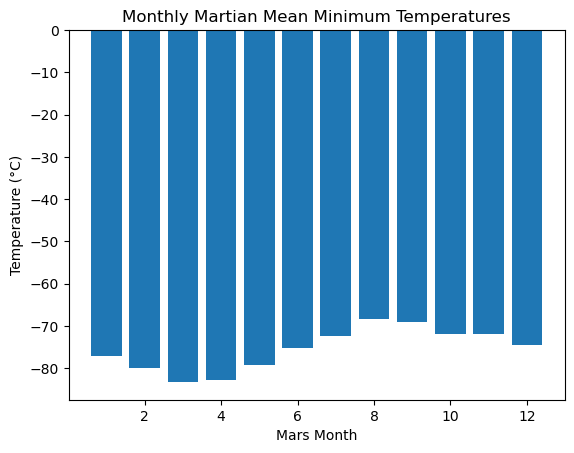

In [116]:
# Plot the average temperature by month

mmt = [{'Mars Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'Average Monthly Temperature': [-77.16091954022988, -79.93258426966293, -83.30729166666667, -82.74742268041237, -79.30872483221476, -75.29931972789116, -72.28169014084507, -68.38297872340425, -69.17164179104478, -71.98214285714286, -71.98550724637681, -74.45180722891567]}]

months = mmt[0]['Mars Month']
temperatures = mmt[0]['Average Monthly Temperature']

plt.bar(months, temperatures)

plt.title('Monthly Martian Mean Minimum Temperatures')
plt.xlabel('Mars Month')
plt.ylabel('Temperature (°C)')

plt.show()

In [118]:
# Identify the coldest and hottest months in Curiosity's location
# Find the average minimum daily temperature for all of the months
mean_min_temp = df_mars_weather_data.groupby('month')['min_temp'].mean()

# Find the coldest and warmest months
coldest_month = mean_min_temp.idxmin()
warmest_month = mean_min_temp.idxmax()

print(f"The coldest month on Mars is {coldest_month} with an average low temperature of {round(mean_min_temp[coldest_month], 2)}°C.")
print(f"The warmest month on Mars is {warmest_month} with an average low temperature of {round(mean_min_temp[warmest_month], 2)}°C.")

The coldest month on Mars is 3 with an average low temperature of -83.31°C.
The warmest month on Mars is 8 with an average low temperature of -68.38°C.


In [120]:
# 4. Average pressure by Martian month
mean_pressure = []
mp = [] #Empty lists
for month in range(1, 13):
    mean_pressure.append(df_mars_weather_data[df_mars_weather_data['month'] == month]['pressure'].mean())
mars_months = list(range(1, 13))
mp = [{'Mars Month': mars_months, 'Average Monthly Pressure': mean_pressure}]
# create a new dataframe with mars_months and mean_min_temp data
df_mp = pd.DataFrame({'Mars Month': mars_months, 'Average Monthly Pressure': mean_pressure})
print(mp)
df_mp

[{'Mars Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'Average Monthly Pressure': [862.4885057471264, 889.4550561797753, 877.3229166666666, 806.3298969072165, 748.5570469798657, 745.0544217687075, 795.1056338028169, 873.8297872340426, 913.3059701492538, 887.3125, 857.0144927536232, 842.156626506024]}]


,Mars Month,Average Monthly Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


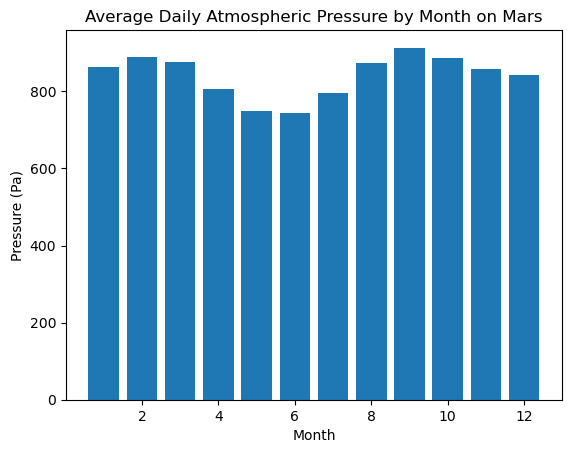

In [123]:
# Find the average daily atmospheric pressure of all the months
mean_pressure = df_mars_weather_data.groupby('month')['pressure'].mean()

# Create a bar chart
plt.bar(mean_pressure.index, mean_pressure.values)

# Set the title and axis labels
plt.title('Average Daily Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')

# Show the plot
plt.show()

In [124]:
# Find the average daily atmospheric pressure for all months
df_mp # See line 19) for calculation.

# Find the months having highest and lowest atmospheric pressure
low_p_month = mean_pressure.idxmin()
high_p_month = mean_pressure.idxmax()
print(f"The month having the lowest atmospheric pressure on Mars is {low_p_month} with an average low pressure of {round(mean_pressure[low_p_month], 2)} Pa.")
print(f"The month having the highest atmospheric pressure on Mars is {high_p_month} with an average high pressure of {round(mean_pressure[high_p_month], 2)} Pa.")



The month having the lowest atmospheric pressure on Mars is 6 with an average low pressure of 745.05 Pa.
The month having the highest atmospheric pressure on Mars is 9 with an average high pressure of 913.31 Pa.


In [127]:
# 5. How many terrestrial (earth) days are there in a Martian year?
print(f"Research on the ""Mars"" article on Wikipedia, https://en.wikipedia.org/wiki/Mars, shows the Martian sidereal year to be 686.98 days or, effectively, 687 days.")
print(f"We can estimate that time by inspecting and calculating the difference between two peaks or troughs in this data,\nspanning just over five terrestrial years and being just under three Martian years.")

Research on the Mars article on Wikipedia, https://en.wikipedia.org/wiki/Mars, shows the Martian sidereal year to be 686.98 days or, effectively, 687 days.
We can estimate that time by inspecting and calculating the difference between two peaks or troughs in this data,
spanning just over five terrestrial years and being just under three Martian years.


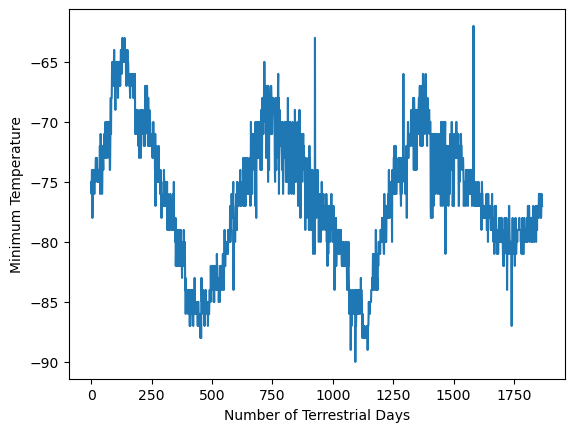

In [161]:
# Find the average daily minimum temperature of all the months
min_temp = df_mars_weather_data.groupby('sol')['min_temp']

df_mars_weather_data['min_temp'].plot(
    kind='line',
    xlabel='Number of Terrestrial Days', 
#     xlabel='sol',
    ylabel='Minimum Temperature')

# Show the plot
plt.show()

In [167]:
# Find the number of Earth days in a Martian year
print(f"Utilizing the most robust peak-to-peak data, roughly 740 to 1420 days and the similar trough-to-trough data, roughly 420 to 1100 days yields 680 days, roughly, in both cases.\nThis compares well with empirical data showing 686.98 sidereal days and is within 98.99% accuracy.\nThere are approximately 680 Earth days in a Martian year.")


Utilizing the most robust peak-to-peak data, roughly 740 to 1420 days and the similar trough-to-trough data, roughly 420 to 1100 days yields 680 days, roughly, in both cases.
This compares well with empirical data showing 686.98 sidereal days and is within 98.99% accuracy.
There are approximately 680 Earth days in a Martian year.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [168]:
# Write the data to a CSV
# Create the output File (CSV)
filename='Mars_Weather_data.csv'

# Export the city_data DataFrame into a CSV file
df_mars_weather_data.to_csv(filename)

In [169]:
browser.quit()